In [11]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [12]:
d_index = 30 #30 for 9/15
d_index_now=31 #31 for 9/16

d_start = 16 #16 for 9/1
d_index_2w = d_index_now+14

dates_array = mdates.drange(dt.datetime(2020,8,16), dt.datetime(2021,1,8), dt.timedelta(days=1))
dates = mdates.num2date(dates_array)

In [13]:
nominal_final=np.loadtxt('nominal_final.csv')
opt_final=np.loadtxt('optimistic_final.csv')
pess_final=np.loadtxt('pessimistic_final.csv')
Cornell_so_far = np.asarray(pd.read_csv('Cornell_so_far.csv')['Counts'][:d_index+1])-26

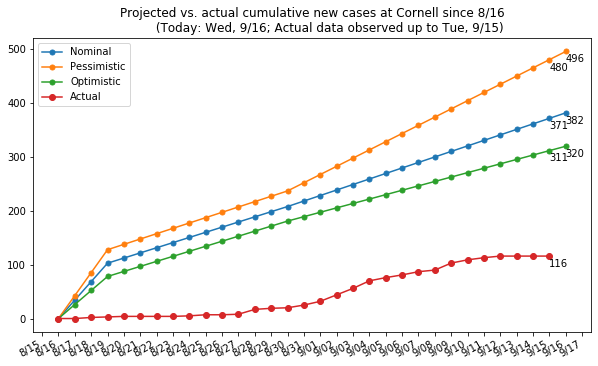

In [14]:

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(dates[:d_index_now+1], nominal_final[:d_index_now+1], '-o', label='Nominal',linewidth=1.5,markersize=5)
ax.plot(dates[:d_index_now+1], pess_final[:d_index_now+1], '-o', label='Pessimistic',linewidth=1.5,markersize=5)
ax.plot(dates[:d_index_now+1], opt_final[:d_index_now+1], '-o', label='Optimistic',linewidth=1.5,markersize=5)
ax.plot(dates[:d_index+1], Cornell_so_far, '-o', label='Actual')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.legend()
ax.annotate(str(int(Cornell_so_far[-1])), (dates[d_index], Cornell_so_far[-1]-20))
ax.annotate(str(int(nominal_final[d_index])), (dates[d_index], nominal_final[d_index]-20))
ax.annotate(str(int(opt_final[d_index])), (dates[d_index], opt_final[d_index]-20))
ax.annotate(str(int(pess_final[d_index])), (dates[d_index], pess_final[d_index]-20))
ax.annotate(str(int(nominal_final[d_index_now])), (dates[d_index_now], nominal_final[d_index_now]-20))
ax.annotate(str(int(opt_final[d_index_now])), (dates[d_index_now], opt_final[d_index_now]-20))
ax.annotate(str(int(pess_final[d_index_now])), (dates[d_index_now], pess_final[d_index_now]-20))

formatter = mdates.DateFormatter("%-m/%d")
ax.xaxis.set_major_formatter(formatter)



fig.autofmt_xdate()

plt.title('Projected vs. actual cumulative new cases at Cornell since 8/16\n \
        (Today: '+dates[d_index_now].strftime('%a, %-m/%d')+'; Actual data observed up to '
          +dates[d_index].strftime('%a, %-m/%d')+')')

plt.show()

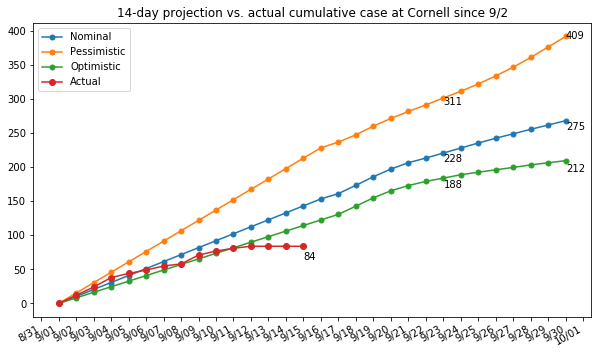

In [15]:

Cornell_since_92=Cornell_so_far[d_start:]-Cornell_so_far[d_start]
nominal_since_92 = nominal_final[d_start:]-nominal_final[d_start]
opt_since_92 = opt_final[d_start:]-opt_final[d_start]
pess_since_92 = pess_final[d_start:]-pess_final[d_start]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(dates[d_start:d_index_2w+1], nominal_since_92[:d_index_2w+1-d_start], '-o', label='Nominal',linewidth=1.5,markersize=5)
ax.plot(dates[d_start:d_index_2w+1], pess_since_92[:d_index_2w+1-d_start], '-o', label='Pessimistic',linewidth=1.5,markersize=5)
ax.plot(dates[d_start:d_index_2w+1], opt_since_92[:d_index_2w+1-d_start], '-o', label='Optimistic',linewidth=1.5,markersize=5)
ax.plot(dates[d_start:d_index+1], Cornell_since_92, '-o', label='Actual')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.legend()
ax.annotate(str(int(Cornell_since_92[-1])), (dates[d_index], Cornell_since_92[-1]-20))
ax.annotate(str(int(nominal_since_92[d_index_2w+1-d_start])), (dates[d_index_2w], nominal_since_92[d_index_2w+1-d_start]-20))
ax.annotate(str(int(opt_since_92[d_index_2w+1-d_start])), (dates[d_index_2w], opt_since_92[d_index_2w+1-d_start]-20))
ax.annotate(str(int(pess_since_92[d_index_2w+1-d_start])), (dates[d_index_2w], pess_since_92[d_index_2w+1-d_start]-20))

ax.annotate(str(int(nominal_since_92[d_index_2w+1-d_start-7])), (dates[d_index_2w-7], nominal_since_92[d_index_2w+1-d_start-7]-20))
ax.annotate(str(int(opt_since_92[d_index_2w+1-d_start-7])), (dates[d_index_2w-7], opt_since_92[d_index_2w+1-d_start-7]-20))
ax.annotate(str(int(pess_since_92[d_index_2w+1-d_start-7])), (dates[d_index_2w-7], pess_since_92[d_index_2w+1-d_start-7]-20))

formatter = mdates.DateFormatter("%-m/%d")
ax.xaxis.set_major_formatter(formatter)



fig.autofmt_xdate()

plt.title('14-day projection vs. actual cumulative case at Cornell since 9/2')

plt.show()